# Issue 9: Add hybridization for select modes using PN class from positive

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from positive import *
from positive.physics import pn
from positive.maths import lim
from matplotlib.pyplot import *
from nrutils import scsearch,gwylm
from nrutils.core.nrsc import gwfcharstart
from positive.physics import mishra
from numpy import *
# Import hybrid class from nrutils 
from nrutils.manipulate.hybridize import make_pnnr_hybrid

(positive)>> Applying custom matplotlib settings.


### Find a simulation

In [2]:
A = scsearch(keyword='q4a0_T_112_448',apply_remnant_fit=True,verbose=True)
# A = scsearch(q=2,keyword='hr-s',verbose=True,nonprecessing=True,apply_remnant_fit=True,institute='gt')
# A = scsearch(keyword='q18a0a08_prad3a_96',verbose=True) # q18a0a0c025_144, q18a0a04c025_96_fine, q18a0aM08c025_96_fine, q18a0a08_prad3a_96

(scsearch)>> Found apply_remnant_fit (=True) keyword.
(scsearch)>> Found keyword (=q4a0_T_112_448) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch!)>> Applying remant fit to scentry objects. This should be done if the final mass and spin meta data are not trustworth. The fit being used only works for non-precessing systems.
## Found 3 possibly degenerate simulations:
[0001][silures] BAM: ns-q4.00	(q4a0_T_112_448)
[0002][silures] BAM: ns-q4.00	(q4a0_T_112_448)
[0003][silures] BAM: ns-q4.00	(q4a0_T_112_448)



### Load the waveform data

In [3]:
y = gwylm( A[0], lmax=3, clean=False, dt=0.5, verbose=True )

(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found lmax (=3) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x10dfa6c68>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(gwylm)>> The (extraction_parameter,level) is (5,6), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3)]
(load)>> Loading: psi3col.r5.l6.l2.m-2.gz
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The waveform time series is now monotonic.
(straighten_wfarr!)>> Repeated time values were found in the array. Offending rows will be removed.
(load)>> Imposing a default padding of 3 to the data.
(pad

In [4]:

# for lm in y.lm:
#     print lm

#     try:
#         go = True
#         bar = gwfcharstart( y[lm]['psi4'] )
#     except:
#         go = False
#         alert('the algo failed here')
        
#     ax,fig = y[lm]['psi4'].plot()
#     for a in ax:
#         sca(a)
#         if a is ax[0]: 
#             yscale('log',nonposy='clip')
#             ylim([1e-7,6e-3])
#         if go: axvline( y.t[bar.left_index] )
#         if go: axvline( y.t[bar.right_index] )
#         #
#         axvline( y.t[y.startindex], color='r' )
#         axvline( y.t[y.endindex_by_amplitude], color='r', ls='--' )
#         axvline( y.t[y.startindex]+4*pi/y.wstart_pn, color='r' )
#     show()

### Package development

In [5]:
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
# Create instance of hybird workflow
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

#
y.__calc_radiated_quantities__()
# strain_w_orb_min = y.lm[2,2]['strain'].dphi[y.remnant['mask']][0]/2
w_orb_min = y.wstart_pn/2
w_orb_merger = y[2,2]['psi4'].dphi[ y[2,2]['psi4'].k_amp_max ]/2

pnwmin = 0.80*w_orb_min
pnwmax = (w_orb_merger+4*w_orb_min)/5
# NOTE that if pnwmax is too large the xcorr guess for t0 will be wrong

# pnwmin = max(0.0025,0.5*strain_w_orb_min)
# pnwmax = 1.5*strain_w_orb_min

# Initiate class instance
this = make_pnnr_hybrid( y,                     # gwylm obj 
                      pn_w_orb_min=pnwmin,   # start of PN freq 
                      pn_w_orb_max=pnwmax,   #   end of PN freq 
                      verbose=True)


# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(make_pnnr_hybrid)>> Validating inputs
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(__validate_inputs__)>> Verbose mode ON.
(__validate_inputs__)>> Valid gwylm object found. Its simulation name is "q4a0_T_112_448".
(__validate_inputs__)>> PN w_orb MIN frequency is 0.017015 (i.e. w_orb*M_init)
(__validate_inputs__)>> PN w_orb MAX frequency is 0.060145 (i.e. w_orb*M_init)

# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(make_pnnr_hybrid)>> Generating PN multipoles
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(pn)>> Now constructing instance of the pn class.
(pn)>> Defining the initial binary state based on inputs.
(__validative_constructor__)>> Rescaling masses so that m1+m2=1
(__calc_orbital_frequency__)>> Calculating evolution of orbital phase using RK4 steps.
(__calc_com_binding_energy__)>> Calculating COM binding energy
(__calc_hlm_of_t__)>> Calculating the (l,m)=(2,2) spherical multipole.


### Write general optimizer for format_aligned data

(__calc_l2m2_hybrid_params__)>> Plots will be generated.
(__calc_l2m2_hybrid_params__)>> The l=m=2 psi4 will be used for determining (initial) optimal hybrid params.
(__calc_l2m2_hybrid_params__)>> Aligning formats of NR and PN data
(__calc_l2m2_hybrid_params__)>> Storing hybrid time series.
(__calc_l2m2_hybrid_params__)>> We will use 2 cycles for the hybridization region's width.
(__calc_l2m2_hybrid_params__)>> Storing shifting functions for future reference.
(__calc_l2m2_hybrid_params__)>> Finding optimal time-shift using scipy.optimize.minimize
(__calc_l2m2_hybrid_params__)>> Storing optimal params to this.optimal_hybrid_params
{'T2': 498.5, 'mask': array([False, False, False, ..., False, False, False], dtype=bool), 'phi0_22': 26.345064584470233, 't0': 17119.803076744913, 'T1': 203.5}


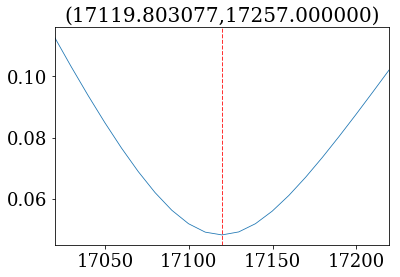

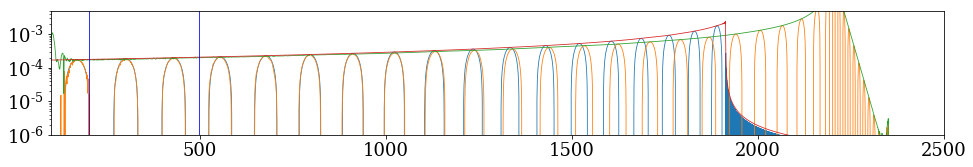

In [6]:
this.__calc_l2m2_hybrid_params__(plot=True)

### Compare PN and NR amplitudes and phases

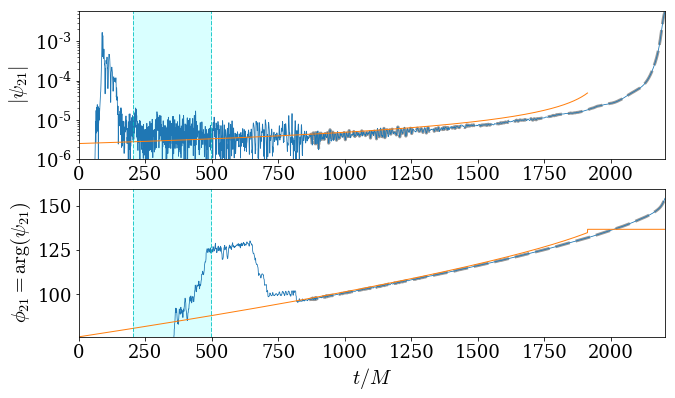

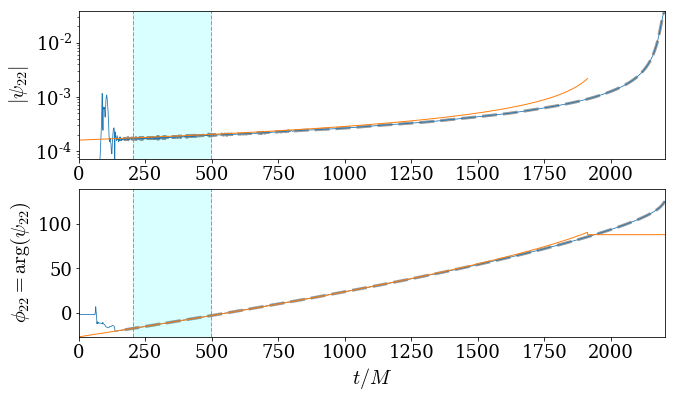

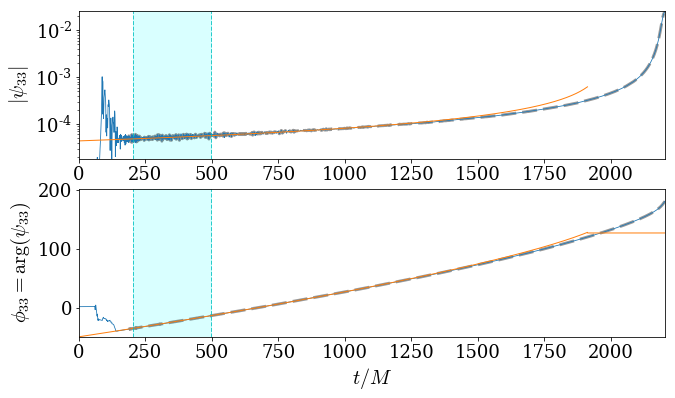

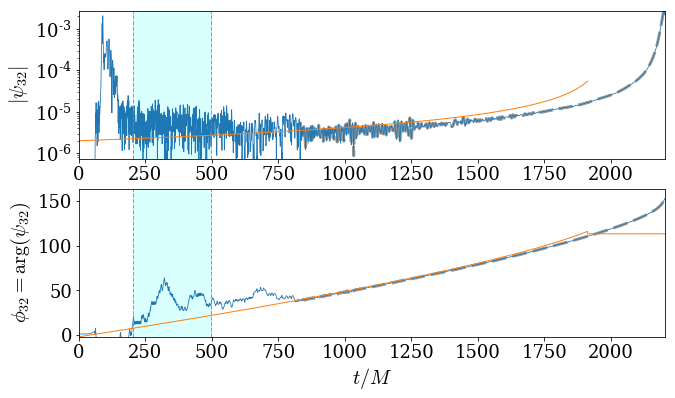

In [7]:
#
for lm in [ (2,1),(2,2),(3,3),(3,2) ]:
    foo = this.__get_nr_pn_amp_phase__( lm, plot=True )

(positive)>> Applying custom matplotlib settings.


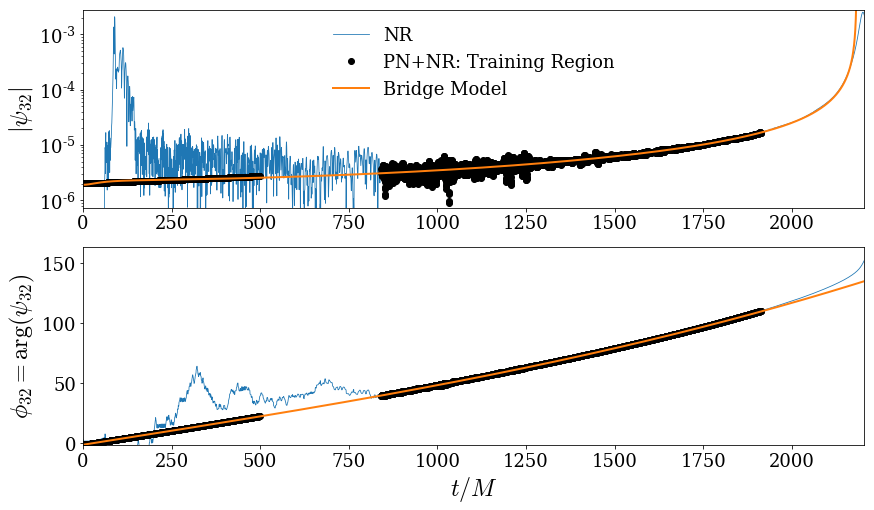

In [47]:
#
lm = (3,2)
t,bridge_t,bridge_amp,bridge_phi,(fig,ax) = this.__calc_bridge_model__( lm, plot=True )

rope = mvrfit( bridge_t, bridge_amp,numerator_symbols=[('0000')],denominator_symbols=['00','0000'],verbose=True )
# print rope
# rope.plot();

# plank = mvrfit( bridge_t, bridge_phi,numerator_symbols=[('0000')],denominator_symbols=['00','0000'],verbose=True )
plank =mvpolyfit( bridge_t, bridge_phi, basis_symbols=['K','0','000'],verbose=True )
# print plank
# plank.plot();

sca(ax[0])
plot( t,rope.eval(t), lw=2,label='Bridge Model' )
legend()

sca(ax[1])
plot( t,plank.eval(t), lw=2,label='Bridge Model' )

### Visualize optimal parameters for all multipoles

(2, -2)
4274 4413
0.00217412680788 0.0


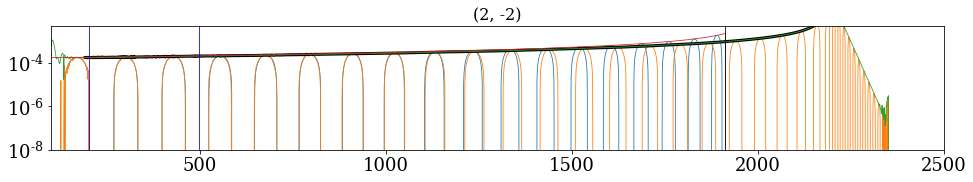

(2, -1)
3404 4413
4.82571476363e-05 0.0


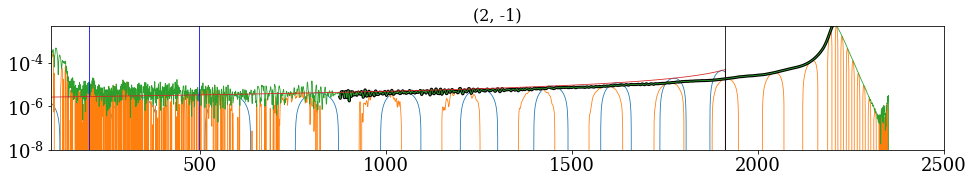

(2, 0)
1699 4413
9.17174476601e-07 0.0


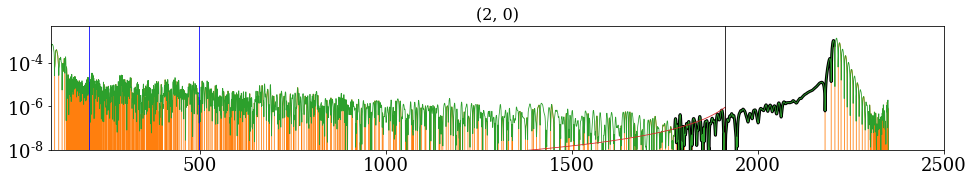

(2, 1)
3404 4413
4.82571476363e-05 0.0


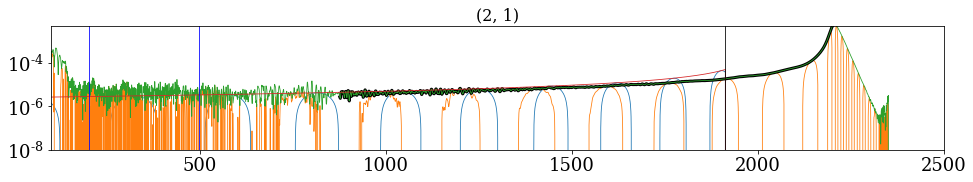

(2, 2)
4274 4413
0.00217412680788 0.0


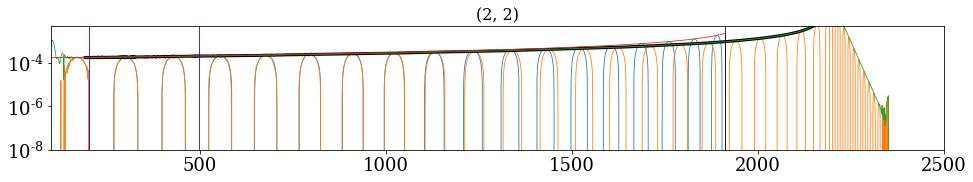

(3, -3)
4233 4413
0.000622341920186 0.0


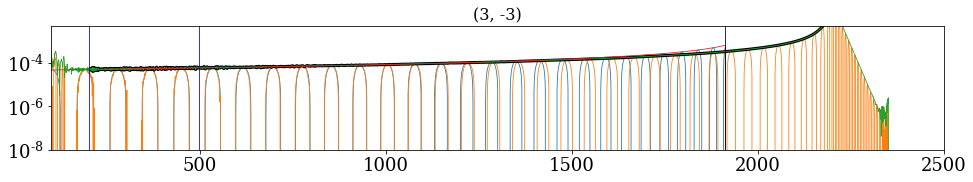

(3, -2)
3243 4413
5.48942505493e-05 0.0


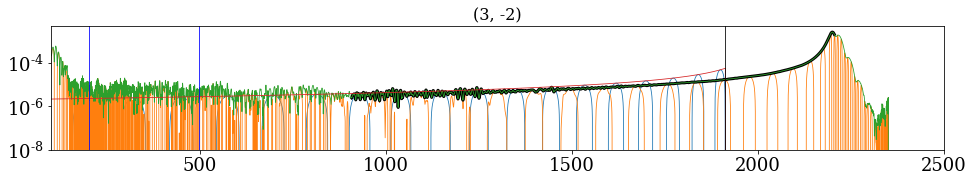

(3, -1)
2408 4413
2.24777031102e-06 0.0


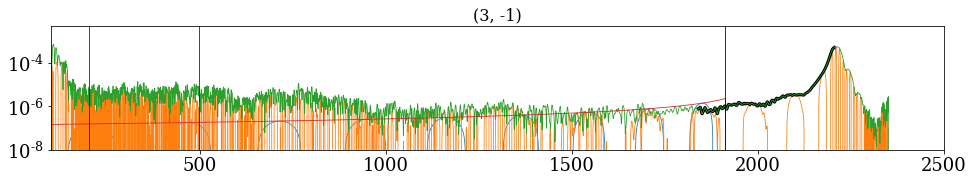

(3, 0)
1821 4413
1.67342755279e-08 0.0


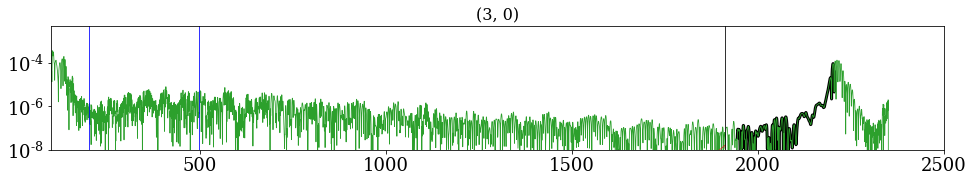

(3, 1)
2408 4413
2.24777031102e-06 0.0


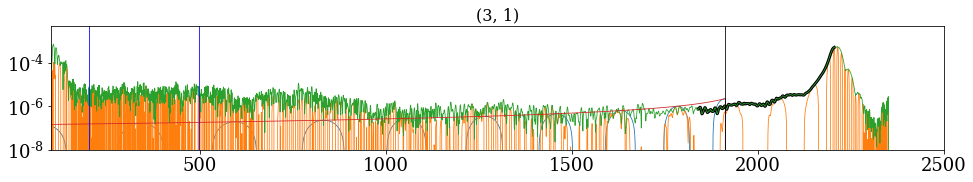

(3, 2)
3243 4413
5.48942505493e-05 0.0


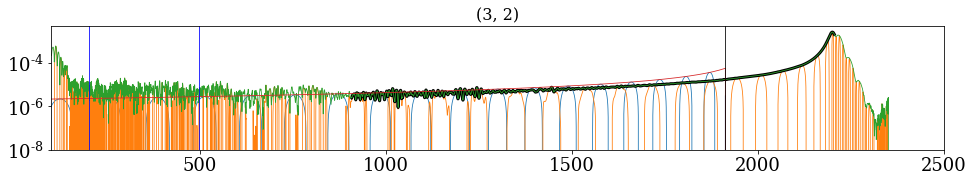

(3, 3)
4233 4413
0.000622341920186 0.0


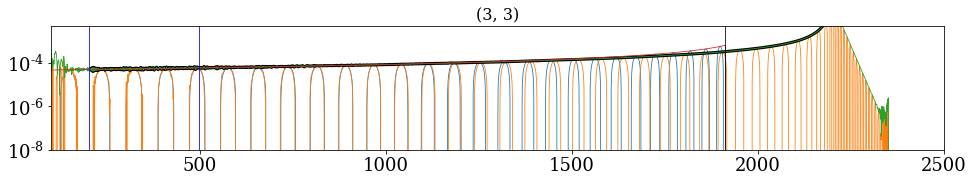

In [63]:

from nrutils import gwf
from nrutils.core.nrsc import gwfcharstart

#
kind = this.__kind__
t = this.t
t0 = this.optimal_hybrid_params['t0']
mask = this.optimal_hybrid_params['mask']
T1 = this.optimal_hybrid_params['T1']
T2 = this.optimal_hybrid_params['T2']

#
pno = this.__pn__
nro = this.gwylmo

# Get the format aligned data
def unpacklm(lm):
    # Get the format aligned data
    pn_t,pn_y,nr_t,nr_y = pno.pn_gwylmo.t,pno.pn_gwylmo[lm][kind].y,nro.t,nro[lm][kind].y
    #
    t_,_,nr_y = format_align(t,t*t,nr_t,nr_y,center_domains=True,verbose=False)
    if not allclose(t_,t): error('bad formatting!')
    t_,_,pn_y = format_align(t,t*t,pn_t,pn_y,center_domains=True,verbose=False)
    if not allclose(t_,t): error('bad formatting!')
    #
    return (nr_y,pn_y)
    
# Find the peak location for l=m=2 to be used for masking below 
k_amp_max_22 = argmax( unpacklm(lm)[0] )

#
for lm in y.__lmlist__:
    
    # Get the format aligned data
    nr_y,pn_y = unpacklm(lm)
    
    # Apply optimal time shift
    pn_y_,phi0 = this.__apply_hyb_params_to_pn__(pn_y,nr_y,t0,MSK=mask,TSMETH='index')
    
    #
    #dog = gwfcharstart( gwf( array([t,pn_y_.real,pn_y_.imag]).T ), shift=4, __smooth__=False )
    
    #
    figure( figsize=1*figaspect(1.0/7) )
    title(lm)
    plot( t, pn_y_.real )
    plot( t, nr_y.real )
    
    #
    print lm
    lamp = smoothest_part( abs(nr_y)[:k_amp_max_22] )
    plot( t[lamp], abs(nr_y)[lamp], color='k', lw=3 )
    
    plot( t, abs(nr_y) )
    plot( t, abs(pn_y_) )
    xlim( [100,2500] )
    axvline(T1,color='b')
    axvline(T2,color='b')
    
    #axvline(t[dog.left_index],color='b',ls='--',lw=2)
    #axvline(t[dog.right_index],color='r',ls='--',lw=2)
    
    yscale('log',nonposy='clip')
    print max(abs(pn_y)),abs(pn_y_)[argmax(abs(pn_y))]
    axvline( t[argmax(abs(pn_y_))],color='k' )
    ylim([1e-8,5e-3])
    # ylim( lim( abs(nr_y)[abs(nr_y)>0] ) )
    show()
    
    


### Experiment with creating a "mixed" model of PN+NR data to overcome NR quality limitations -- to interpolate between PN and the good NR data

f = lambda x0: 5.33546031e-06  +  3.50284816e-06 * (  -3.99203552e-05*(x0*x0) + 2.07416265e-11*(x0*x0*x0*x0) + -9.59198598e-01 ) / ( 1.0 +  4.78667818e-05*(x0*x0) + -1.01725622e-11*(x0*x0*x0*x0) )


/Users/book/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1168: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.any(self._markerfacecolor != fc):


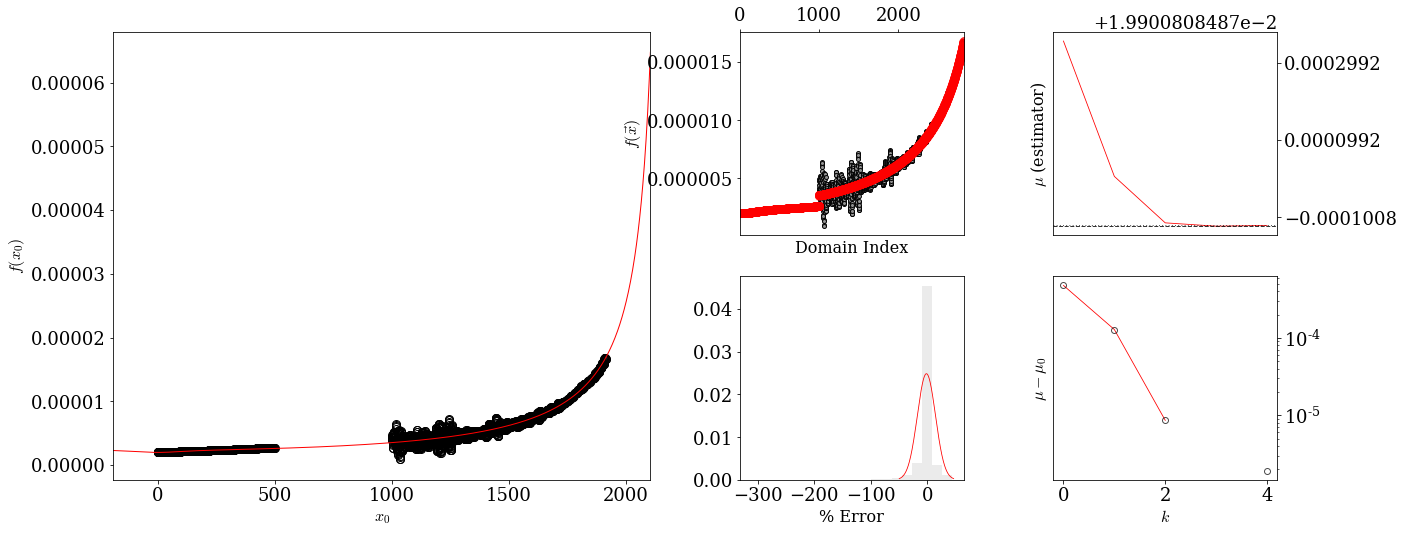

In [13]:
lm = (3,2)

# Get the raw data for this multipole
pn_t,pn_y,nr_t,nr_y = pno.pn_gwylmo.t,pno.pn_gwylmo[lm][kind].y,nro.t,nro[lm][kind].y

# Format align the data
t_,_,nr_y = format_align(t,t*t,nr_t,nr_y,center_domains=True,verbose=False)
t_,_,pn_y = format_align(t,t*t,pn_t,pn_y,center_domains=True,verbose=False)

# Apply optimal alignment params
pn_y_,phi0 = this.__apply_hyb_params_to_pn__(pn_y,nr_y,t0,MSK=mask)

# ~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~- #
# Create the "mixed" dataset for modeling of the amplitude and phase
# ~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~- #

#
# T_NR_JUNK_END = ?
T_NR_JUNK_END = 1000

# Domain: (PN before end of hyb region) + (nr after noisey region, before peak)
pnmask = (t<=T2)
nrmask = (t>=T_NR_JUNK_END) & (t<=t[argmax(abs(pn_y_))]) 
y_ = zeros_like(nr_y)
y_[pnmask] = pn_y_[pnmask]
y_[nrmask] = nr_y[nrmask]

t_ = t[ nrmask | pnmask ]
y_ = y_[ nrmask | pnmask ]


# k = t<t[argmax(abs(pn_y_))]
bar = mvrfit( t_, abs(y_),numerator_symbols=[('0000')],denominator_symbols=['00','0000'],verbose=True )
# bar = mvrfit( t[k], abs(nr_y[k]),numerator_symbols=[('0000')],denominator_symbols=['00','0000'],verbose=True )
# bar = gmvrfit( t_, abs(y_),verbose=True,fitatol=1e-2 )
print bar
bar.plot();

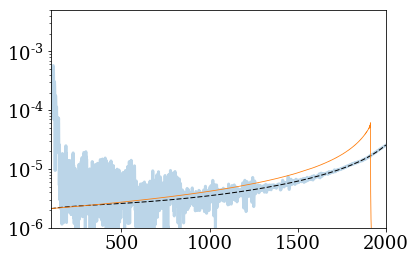

In [14]:
figure()
plot( t, abs(nr_y), alpha=0.3, lw=3 )
plot( t, bar.eval(t), lw=1, color='k',ls='--' )
plot( t, abs(pn_y_) )
xlim( [100,2000] )
ylim([1e-6,5e-3])
yscale('log')

0.453670785717


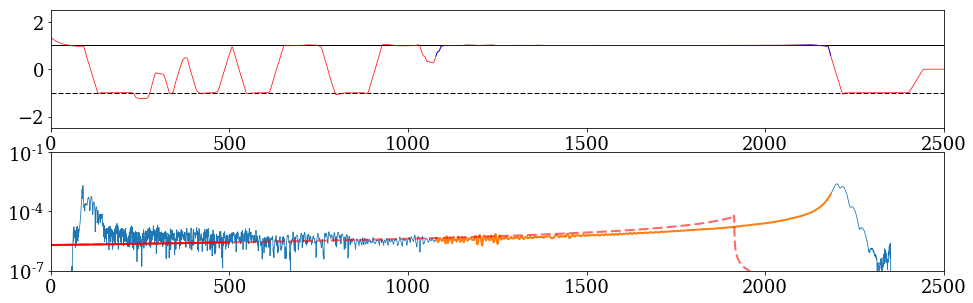

In [15]:

#
figure( figsize=1.2*figaspect(2.1/7) )

#
subplot(2,1,1)
axhline(1,color='k',lw=1)
axhline(-1,color='k',lw=1,ls='--')

#
r=100
w=80

x_ = smooth( smoothness( smooth(abs(nr_y),w).answer ,r=r,stepsize=10), w ).answer
# x_ = smooth( smoothness(abs(nr_y),r=r,stepsize=20), 80 ).answer
print std(x_)
plot( t, x_, '-', alpha=0.9, color='r' )

tol = std(x_)
k = abs(x_-1)<tol

c,m = clump(k[0:argmax(abs(nr_y))])
k_ = m[ argmax( [ len(_) for _ in m ] ) ]

#
# k_ = smoothest_part( abs(nr_y)[:argmax(abs(nr_y))] )

        
plot( t[k_], x_[k_], 'b' )

xlim( [0,2500] )
ylim( 2.5*array([-1,1])  )


subplot(2,1,2)
plot( t,abs(nr_y) )
plot( t[k_],abs(nr_y)[k_], lw=2 )
plot( t, abs(pn_y_), '--r', lw=2, alpha=0.6 )
plot( t[pnmask], abs(pn_y_)[pnmask], 'r', lw=2 )
xlim( [0,2500] )
ylim([1e-7,1e-1])
yscale('log')


3231 4401


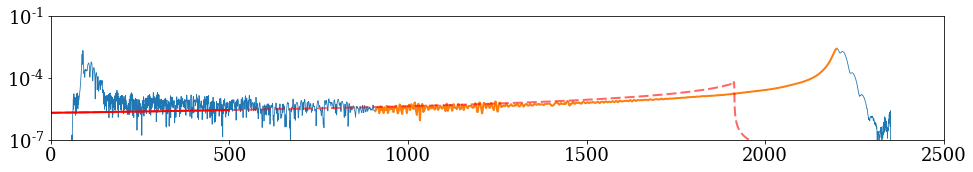

In [16]:

#
k_ = smoothest_part( abs(nr_y)[:argmax(abs(nr_y))] )

#     
figure( figsize=1*figaspect(1.0/7) )
plot( t,abs(nr_y) )
plot( t[k_],abs(nr_y)[k_], lw=2 )
plot( t, abs(pn_y_), '--r', lw=2, alpha=0.6 )
plot( t[pnmask], abs(pn_y_)[pnmask], 'r', lw=2 )
xlim( [0,2500] )
ylim([1e-7,1e-1])
yscale('log')
